1. Read the data from your file. (CSV.read)
2. Set up the data as xs and ys in Julia (and zip for Flux)
3. Set up the model and loss function.
4. Which optimization method (the parameters to be optimized, the    stepsize)
5. Train
6. The answer is in the parameters of the model.

In [53]:
using Flux

In [8]:
using CSV

apples = CSV.read("data/Apple_Golden_1.dat", delim='\t')
bananas = CSV.read("data/bananas.dat", delim='\t')

,height,width,red,green,blue
1,98,99,0.583507,0.500662,0.207504
2,50,99,0.609666,0.514869,0.186871
3,52,99,0.610012,0.515759,0.187504
4,99,69,0.568033,0.492939,0.239316
5,51,99,0.609766,0.51485,0.183329
6,53,99,0.608089,0.514609,0.183374
7,53,99,0.608676,0.515487,0.186206
8,53,99,0.609278,0.516486,0.188582
9,99,67,0.569099,0.494501,0.241941
10,54,99,0.610284,0.516183,0.189116


and processing it to extract information about the red and green coloring in our images:

In [52]:
col1 = :red
col2 = :green

x_apples  = [ [apples[i, col1], apples[i, col2]] for i in 1:size(apples)[1] ]
x_bananas = [ [bananas[i, col1], bananas[i, col2]] for i in 1:size(bananas)[1] ]

xs = vcat(x_apples, x_bananas)

ys = vcat( zeros(size(x_apples)[1]), ones(size(x_bananas)[1]) );

data = zip(xs, ys);

In [10]:
xs

982-element Array{Array{Float64,1},1}:
 [0.708703, 0.641282]
 [0.648376, 0.553169]
 [0.647237, 0.553302]
 [0.647963, 0.55323] 
 [0.647653, 0.554047]
 [0.648491, 0.553821]
 [0.647974, 0.554518]
 [0.649307, 0.554399]
 [0.648141, 0.554708]
 [0.64984, 0.555665] 
 [0.648446, 0.555576]
 [0.709808, 0.632473]
 [0.650164, 0.555766]
 ⋮                   
 [0.52913, 0.44031]  
 [0.528731, 0.456548]
 [0.524028, 0.452379]
 [0.523906, 0.452571]
 [0.523823, 0.4514]  
 [0.522489, 0.449973]
 [0.517573, 0.444391]
 [0.515956, 0.441912]
 [0.517585, 0.444827]
 [0.510357, 0.436022]
 [0.508873, 0.43433] 
 [0.528205, 0.440139]

In [13]:
model = Dense(2, 1, σ)

loss(x, y) = Flux.mse(model(x), y)

Dense(2, 1, NNlib.σ)

In [14]:
opt = SGD([model.W, model.b], 0.01) # or
# opt = SGD(params(model), 0.01)

(::#80) (generic function with 1 method)

In [31]:
for i in 1:1000
    Flux.train!(loss, data, opt)
end

In [17]:
using Plots

In [50]:
gr()

Plots.GRBackend()

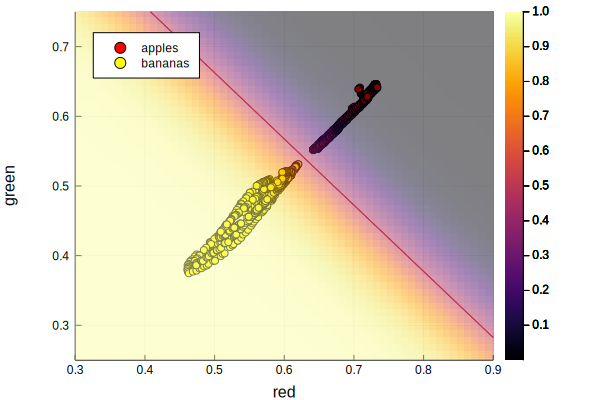

In [51]:
scatter(first.(x_apples), last.(x_apples), label="apples", c=:red, leg=:topleft, aspect_ratio=1)
scatter!(first.(x_bananas), last.(x_bananas), label="bananas", c=:yellow)

xlabel!("red")
ylabel!("green")

contour!(0:0.01:1, 0:0.01:1, (x,y)->model([x,y]).data[1], levels=[0.5, 0.501])

heatmap!(0:0.01:1, 0:0.01:1, (x,y)->model([x,y]).data[1], alpha=0.5)

xlims!(0.3, 0.9)
ylims!(0.25, 0.75)

In [48]:
plotlyjs()

Plots.PlotlyJSBackend()

In [45]:
scatter(first.(x_apples), last.(x_apples), zeros(length(x_apples)), label="apples", c=:red, leg=:topleft, aspect_ratio=1, ms=1)
scatter!(first.(x_bananas), last.(x_bananas), ones(length(x_bananas)), label="bananas", c=:yellow, ms=1)

surface!(0:0.01:1, 0:0.01:1, (x,y)->model([x,y]).data[1], alpha=0.8)

xlabel!("red")
ylabel!("green")
title!("Neural network model function with best parameters after training")